# Data Science and Business Analytics Internship @The Spark Foundation

# By: Ayoub TAYACH

Level Intermediate

Task 4: Exploratory Data Analysis-Terrorism 
Dataset can be found at: https://bit.ly/2TK5Xn5

Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset using pandas "read_csv" method

In [ ]:
path = "/content/globalterrorismdb_0718dist.csv"
df = pd.read_csv(path,encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First row of the data

In [ ]:
df.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


Meta Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


Statistical Values about the data

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

Data Cleaning

In [ ]:
df.drop('eventid', axis=1, inplace  = True)

In [ ]:
df.head(1)

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [ ]:
df.shape

(181691, 134)

In [ ]:
pd.DataFrame(df.isna().sum()).T

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,0,0,172452,0,179471,0,0,0,0,421,434,4556,4557,6,0,126196,66129,0,0,0,1,152680,152680,1,0,0,0,0,175377,175377,181263,181263,0,0,10373,10373,42550,636,1559,...,181621,181621,67670,10313,64446,66958,16311,64702,69143,0,117626,117626,142702,123732,178,168119,168174,177628,173567,181367,178386,104310,180341,181128,180917,181139,181177,170700,170700,171291,153402,66191,104758,138175,0,0,0,0,0,156653


In [ ]:
thresold = len(df)*0.5
df = df.dropna(thresh=thresold, axis=1)

In [ ]:
pd.DataFrame(df.isnull().sum()).T

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,0,0,0,0,0,0,0,0,421,434,4556,4557,6,0,66129,0,0,0,1,1,0,0,0,0,0,0,10373,10373,42550,636,1559,1559,0,380,0,71115,69489,66120,0,0,20768,20768,67670,10313,64446,66958,16311,64702,69143,0,178,66191,0,0,0,0,0


In [ ]:
df.shape

(181691, 57)

In [ ]:
list_col  = df.columns.to_list()

In [ ]:
for i in list_col:
  print(df[i].describe())
  print("--------------")

In [ ]:
list_num_cols  = df.select_dtypes(include = ['float64']).columns.to_list()

In [ ]:
for i in list_num_cols:
  df[i].fillna(df[i].mean(), inplace  =True)

In [ ]:
list_str_cols  = df.select_dtypes(include = ['object']).columns.to_list()


In [ ]:
for i in list_str_cols:
  df[i].fillna(df[i].mode(), inplace  =True)

In [ ]:
df.head(1)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Baghdad,Santo Domingo,18.456792,-69.951164,1.0,0,"09/00/2016: Sometime between September 18, 201...",1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Unknown,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,-65.361154,-1.517727,0.049666,13,Unknown,11.117162,Unknown Explosive Type,Explosive,1.0,0.045981,0.508058,0.0,0.038944,0.107163,0,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0


Some Visulisations

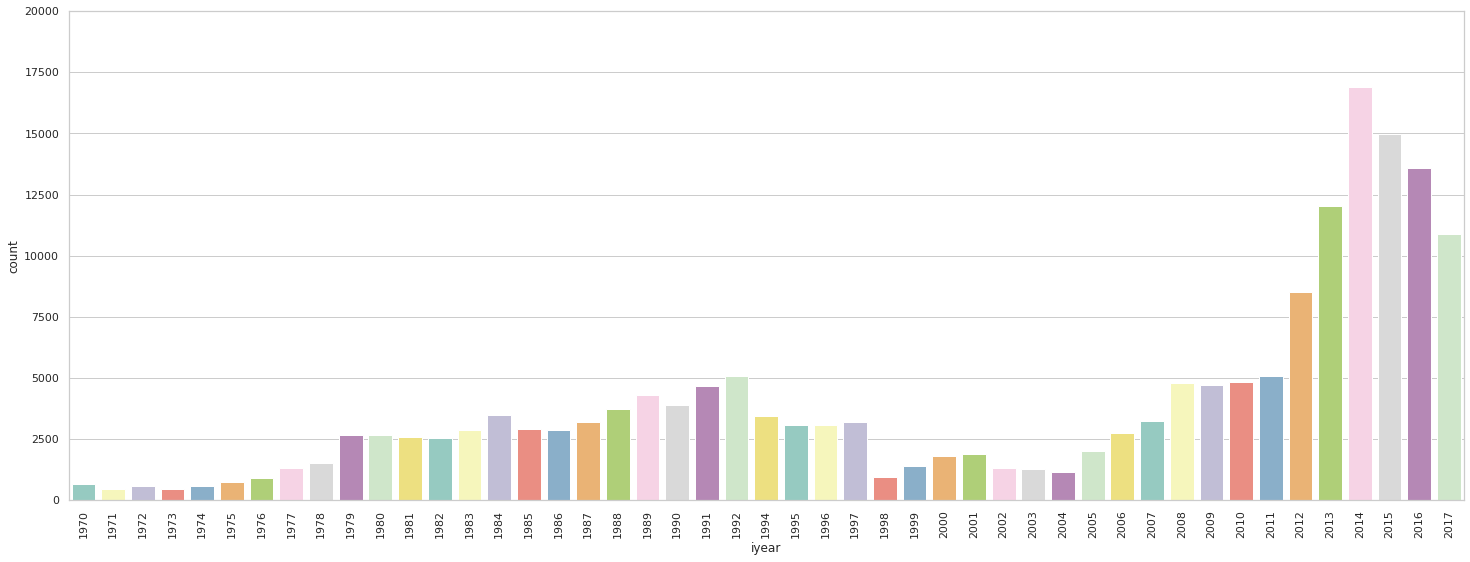

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25,9))
plt.ylim(0,20000,500)
plt.xticks(rotation=90)
sns.countplot(x=df['iyear'],palette="Set3")

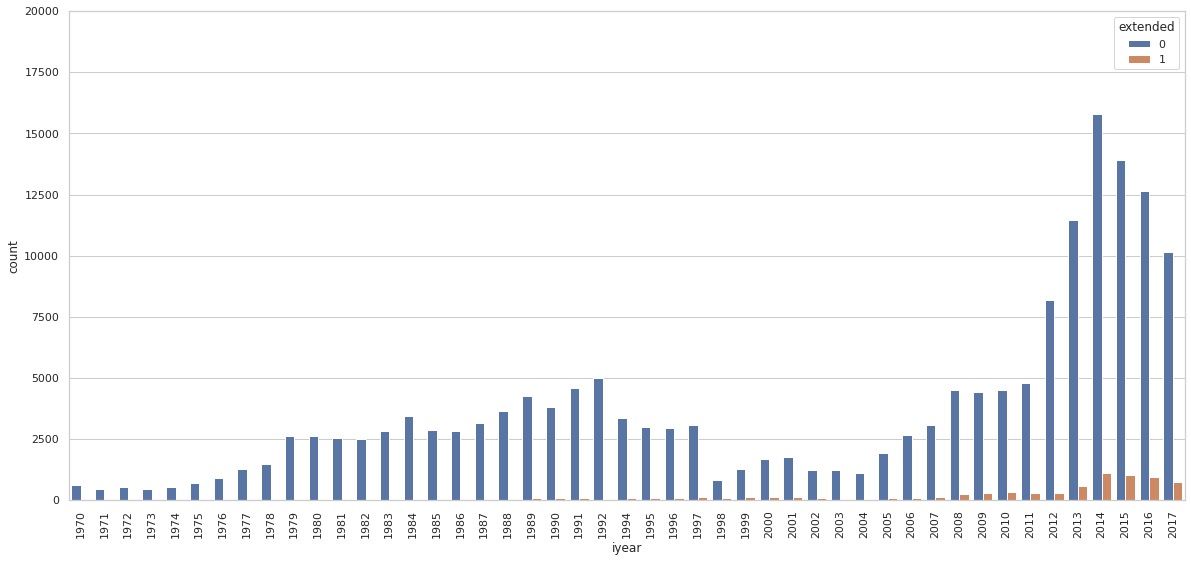

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,9))
plt.ylim(0,20000,500)
plt.xticks(rotation=90)
sns.countplot(x=df['iyear'], hue = df['extended'])

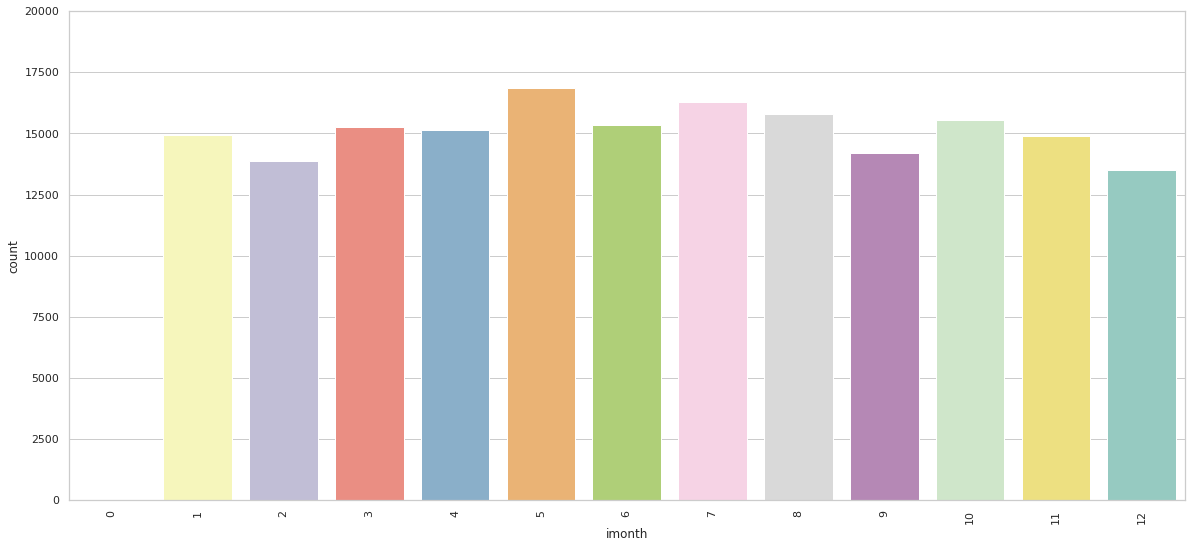

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,9))
plt.ylim(0,20000,500)
plt.xticks(rotation=90)
plt.ylabel('Number of attacks')
plt.xlabel('Months')
sns.countplot(x=df['imonth'],palette="Set3")

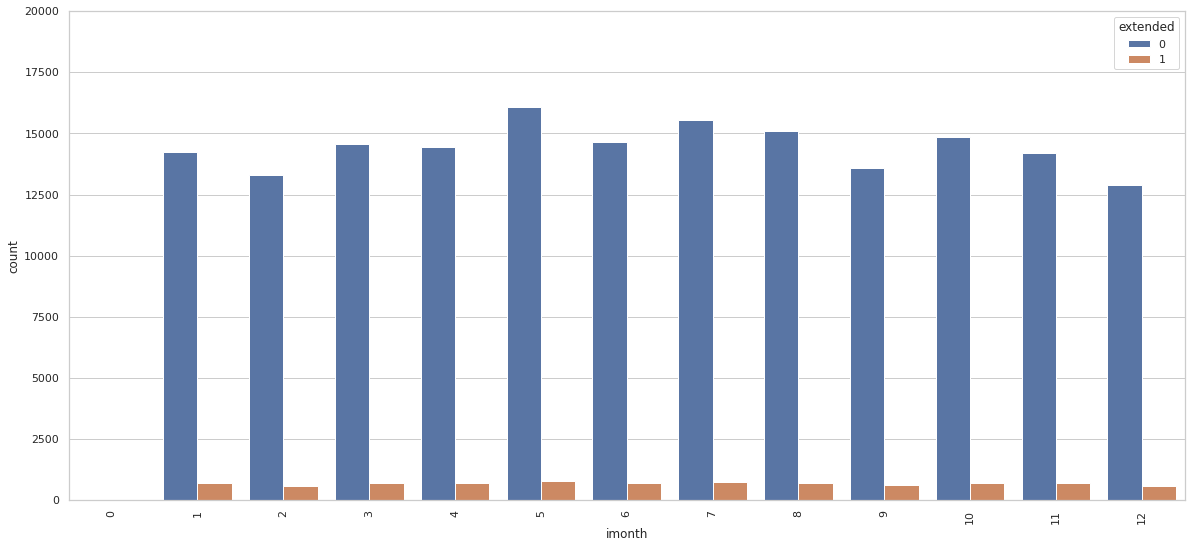

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,9))
plt.ylim(0,20000,500)
plt.xticks(rotation=90)
plt.ylabel('Number of attacks')
plt.xlabel('Months')
sns.countplot(x=df['imonth'], hue = df['extended'])

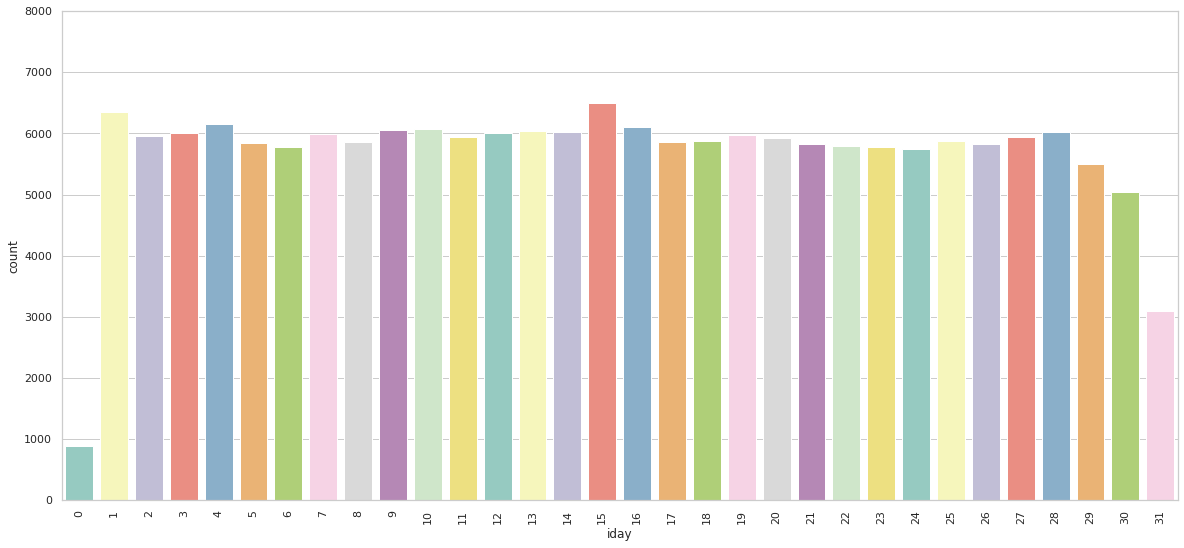

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,9))
plt.ylim(0,8000,500)
plt.xticks(rotation=90)
plt.ylabel('Number of attacks')
plt.xlabel('Months')
sns.countplot(x=df['iday'],palette="Set3")

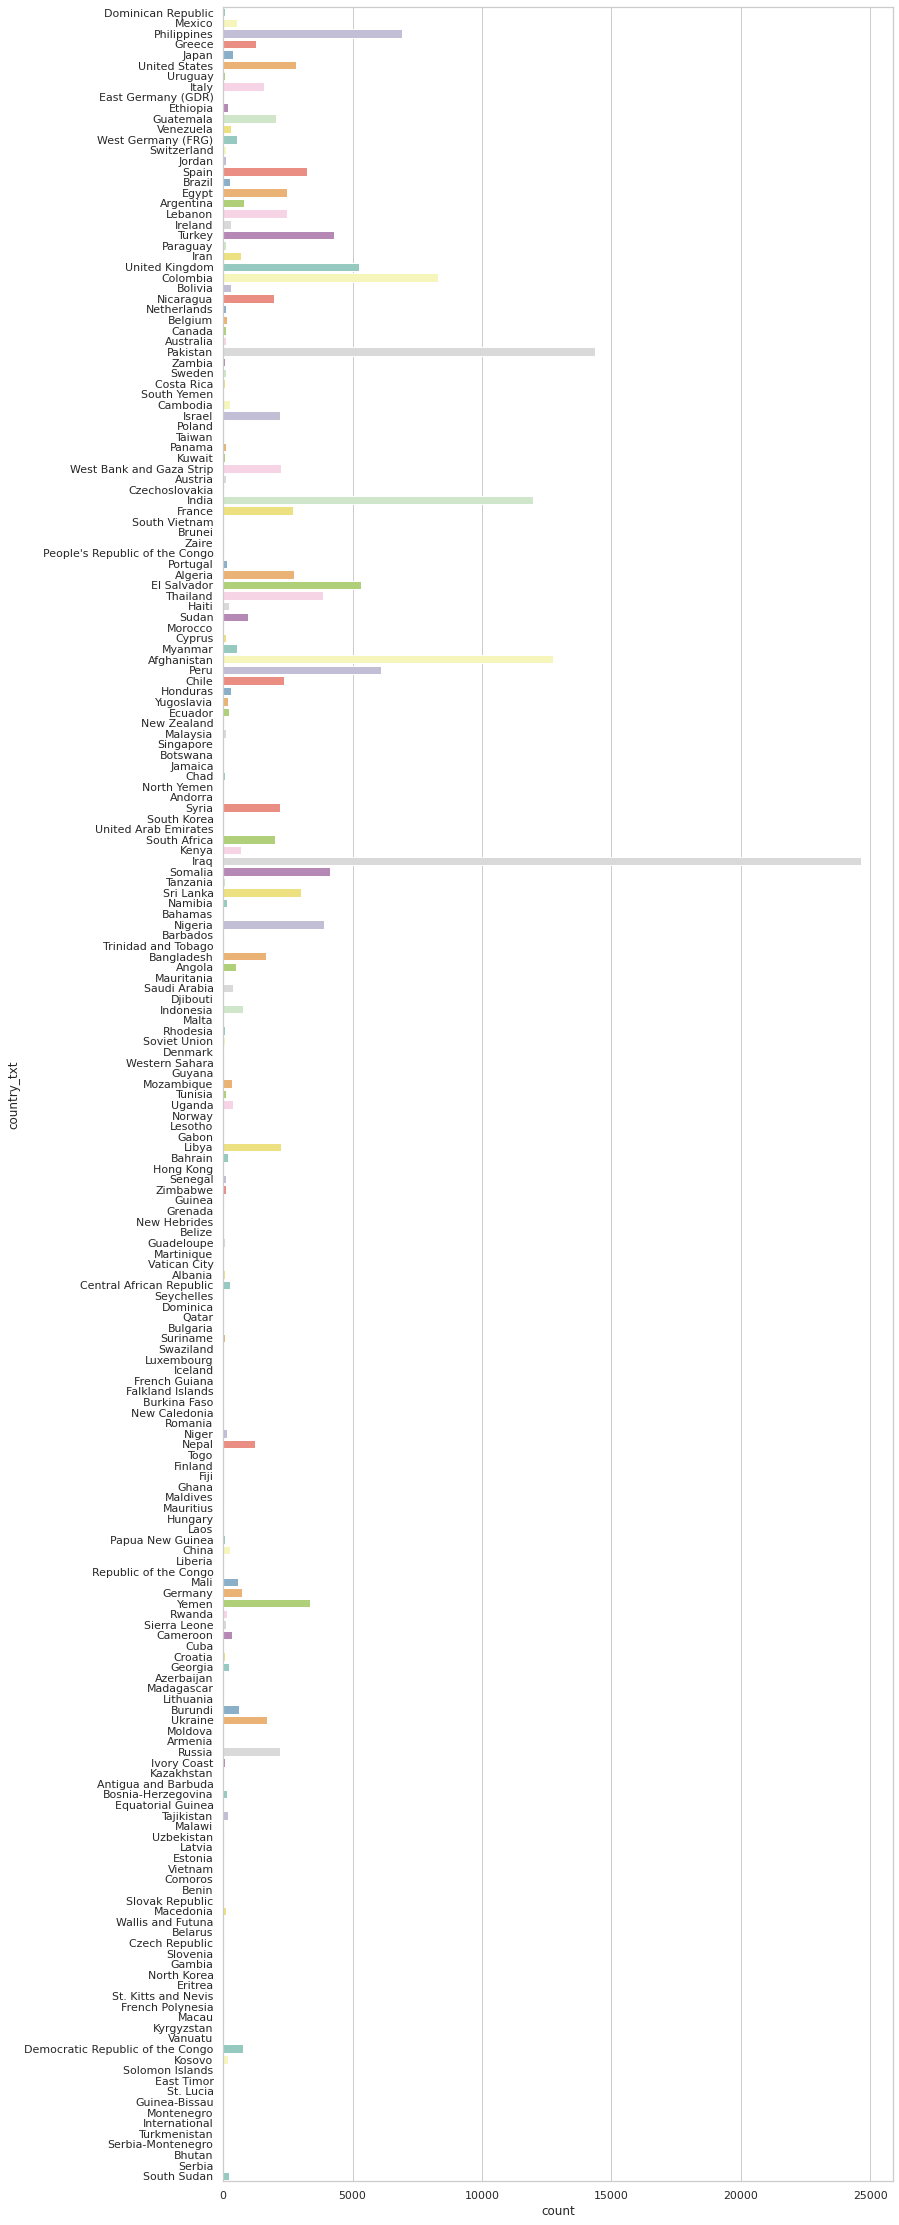

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,40))
sns.countplot(y=df['country_txt'],palette="Set3")

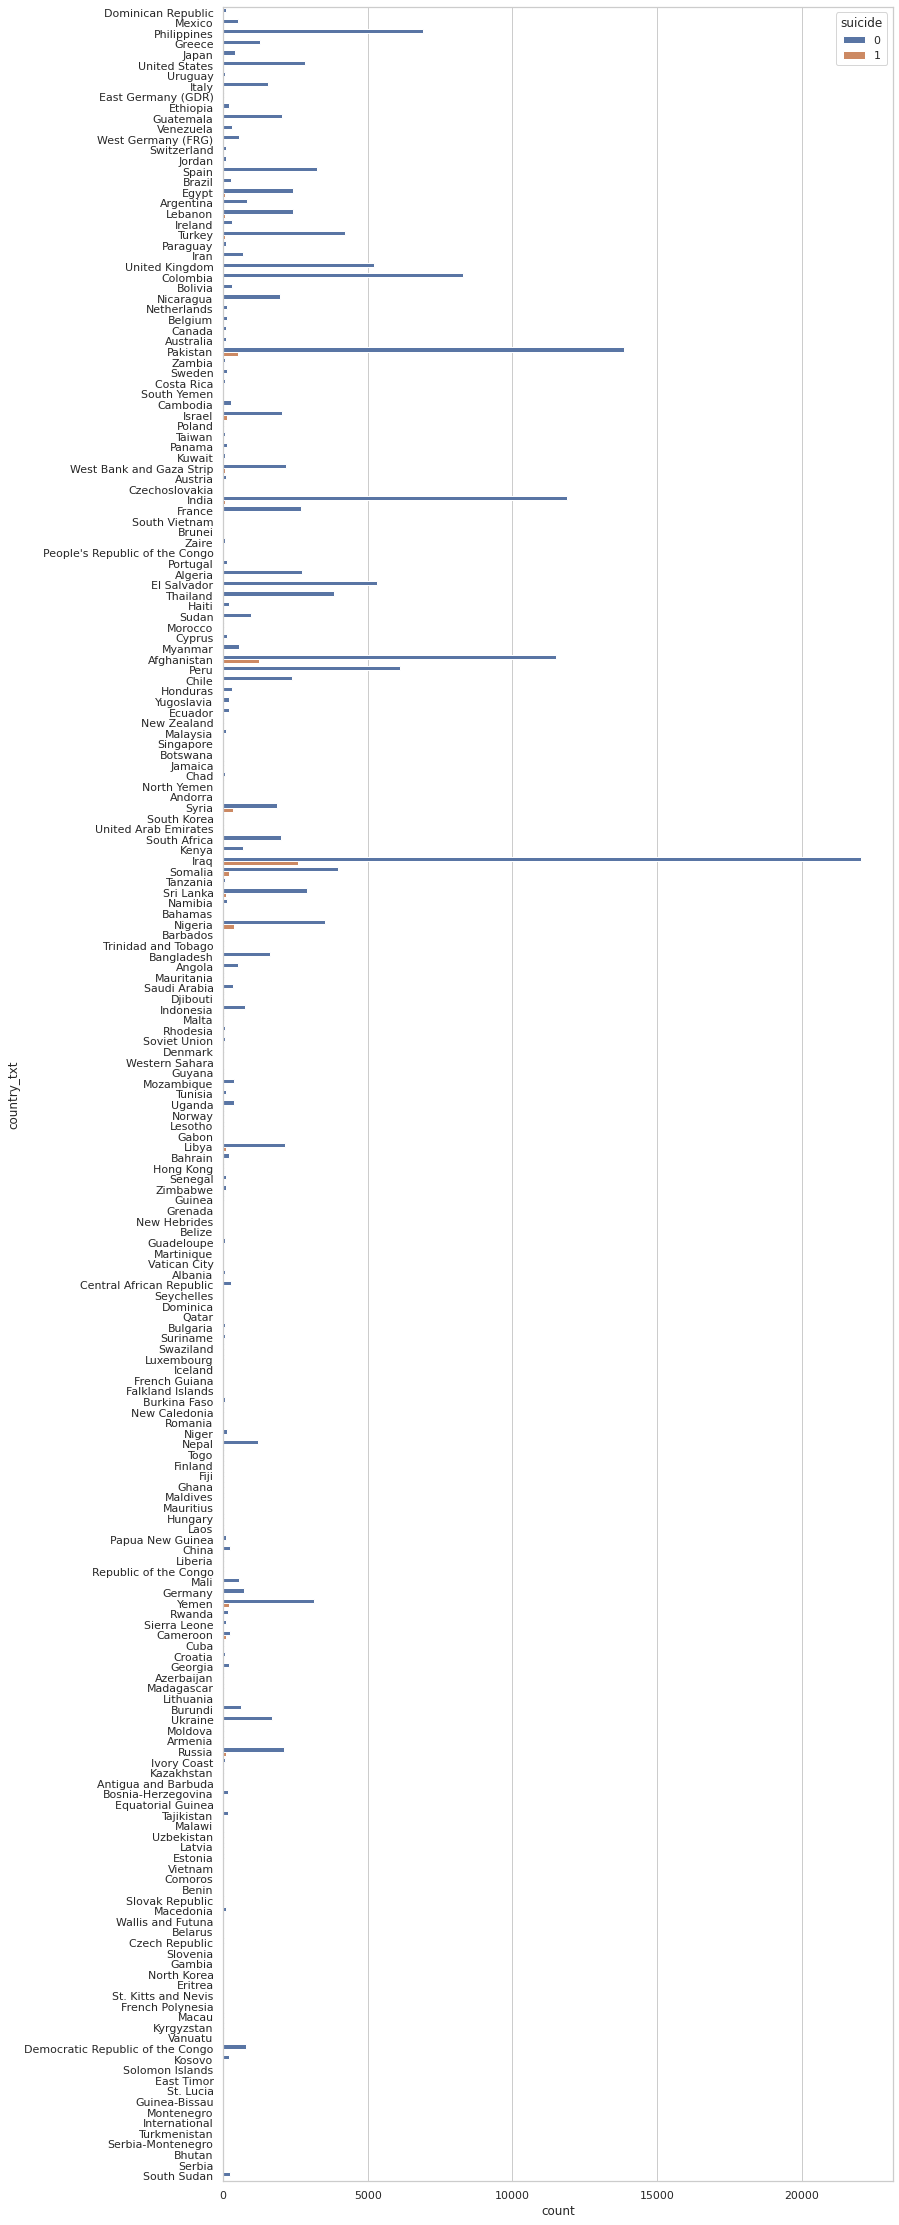

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,40))
sns.countplot(y=df['country_txt'], hue = df['suicide'])

In [ ]:
pd.DataFrame(df['country_txt'].value_counts()).head(10)

,country_txt
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


India

In [ ]:
India_df  = df.loc[df['country_txt'] == 'India']

In [ ]:
India_df.head(1)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1186,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,-1.517727,0.049666,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,Hijacking DB,1,1,1,1


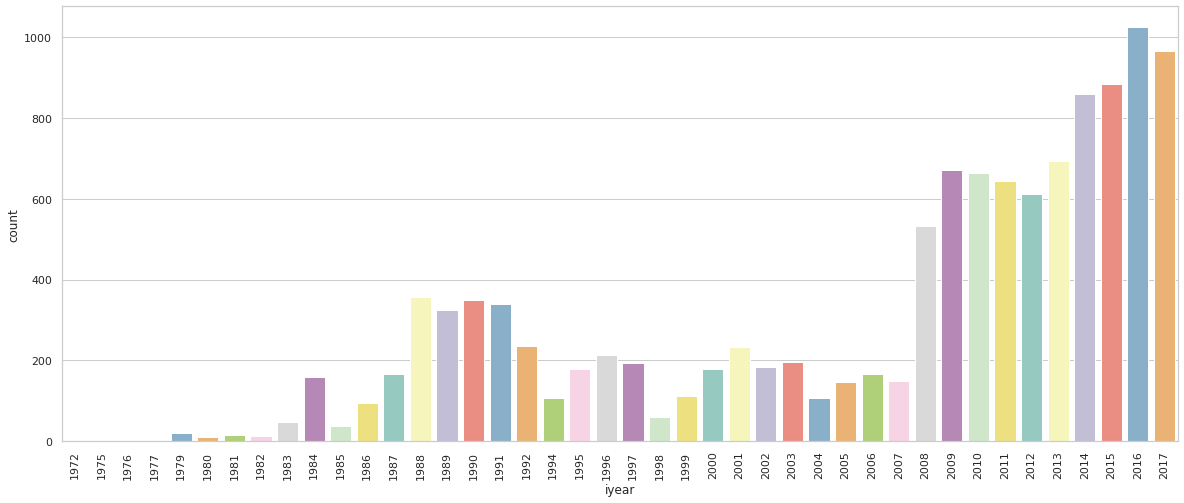

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= India_df['iyear'], palette="Set3")

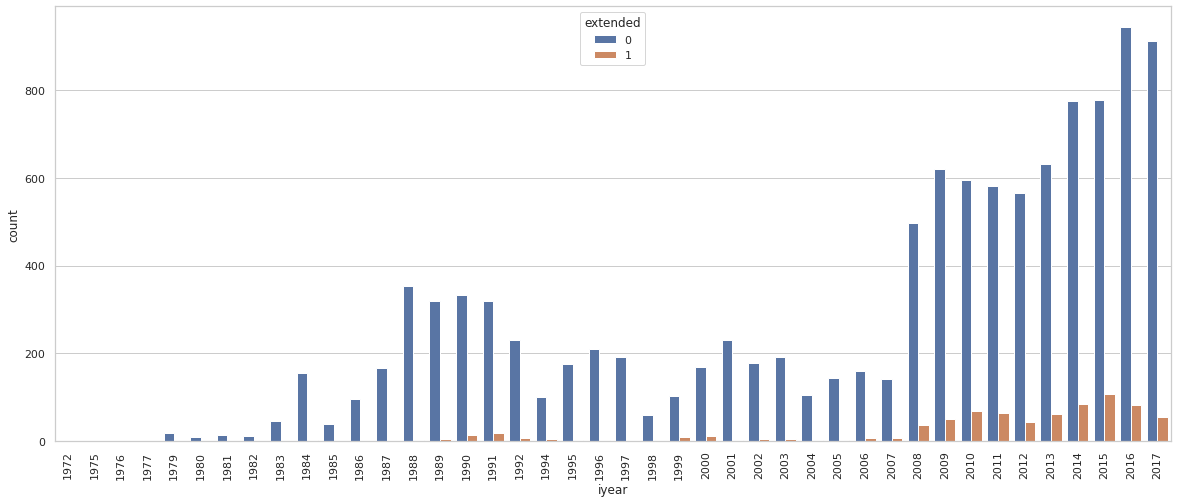

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= India_df['iyear'], hue = India_df['extended'])

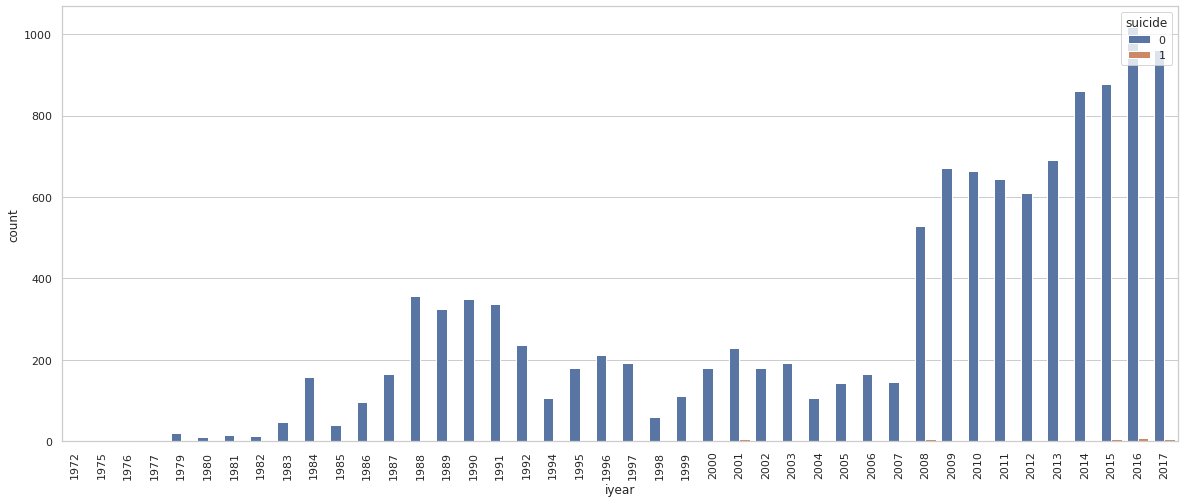

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= India_df['iyear'], hue = India_df['suicide'])

In [ ]:
pd.DataFrame(India_df['provstate'].value_counts()).head(20)

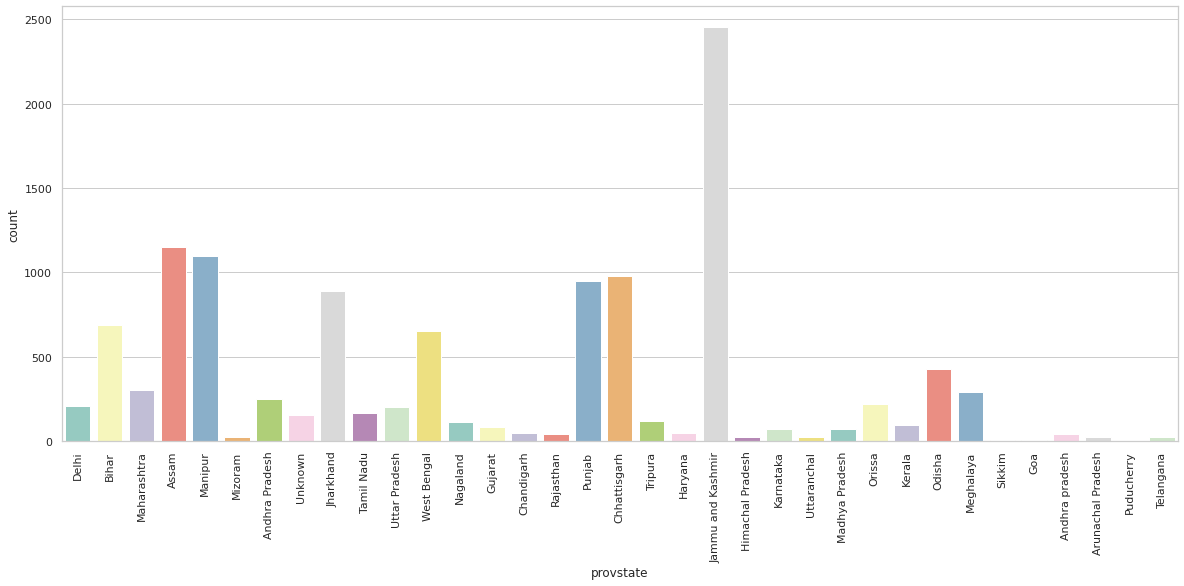

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= India_df['provstate'],palette="Set3")

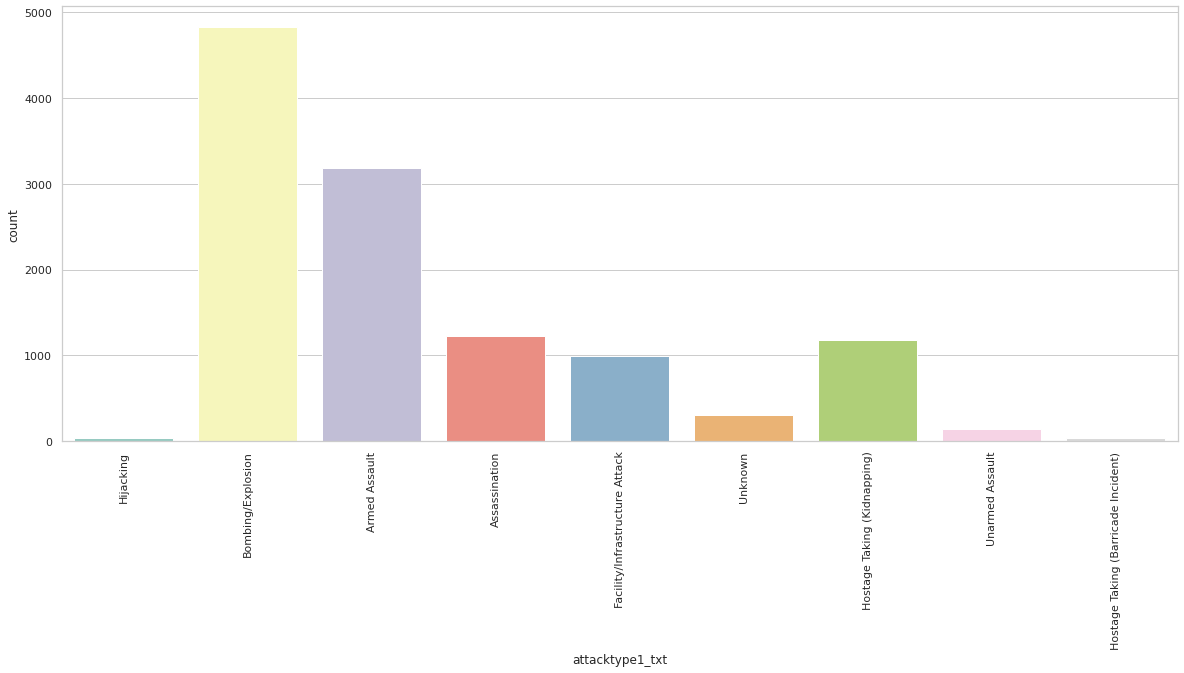

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= India_df['attacktype1_txt'],palette="Set3")

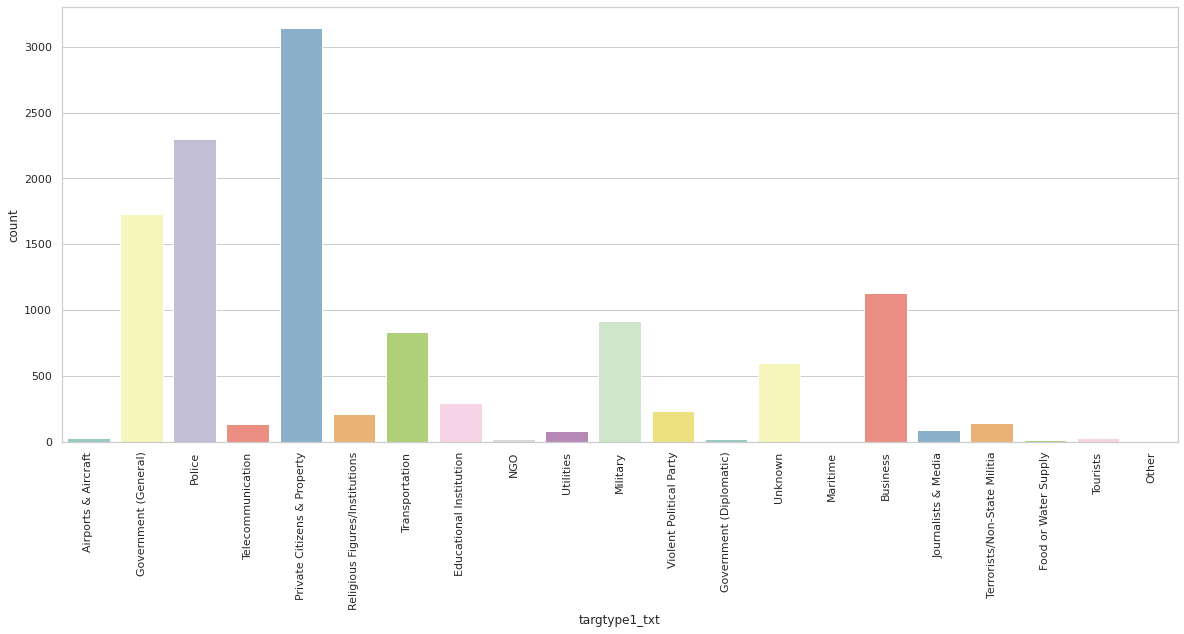

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= India_df['targtype1_txt'],palette="Set3")


In [ ]:
pd.DataFrame(India_df['gname'].value_counts())

,gname
Unknown,4263
Communist Party of India - Maoist (CPI-Maoist),1877
Maoists,1396
Sikh Extremists,710
United Liberation Front of Assam (ULFA),357
...,...
Shiv Sena,1
Secessionists,1
Tripura Nationalists,1
Bodo People's Front (BPF),1


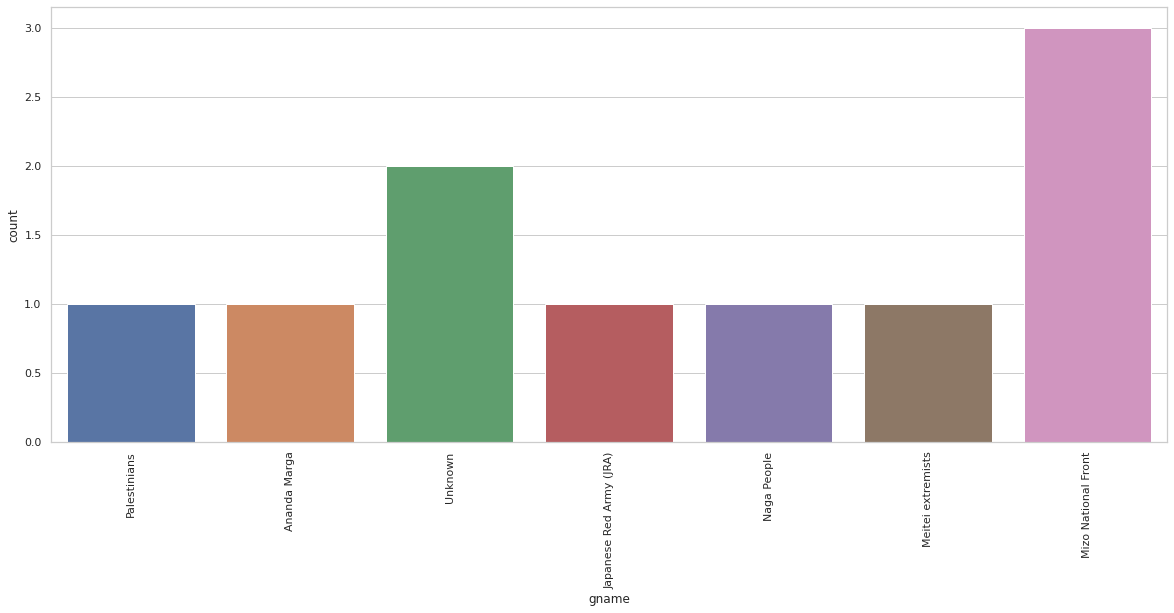

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= India_df['gname'].head(10))

In [ ]:
pd.DataFrame(India_df['weaptype1_txt'].value_counts())

,weaptype1_txt
Explosives,5030
Firearms,4530
Incendiary,930
Unknown,908
Melee,502
Sabotage Equipment,32
Chemical,12
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",7
Other,7
Fake Weapons,2


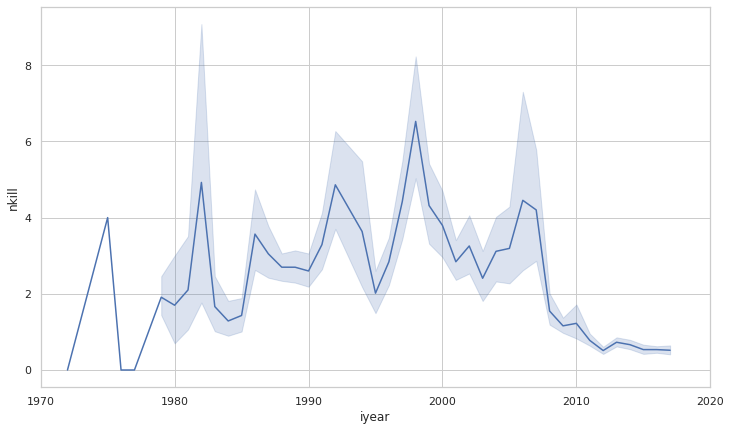

In [ ]:
plt.figure(figsize = (12,7))
plt.xlim(1970,2020,5)
sns.lineplot( x =  India_df['iyear'], y = India_df['nkill'])

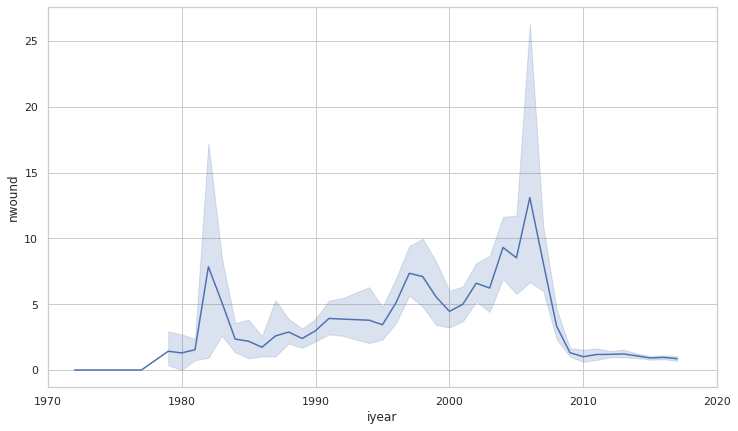

In [ ]:
plt.figure(figsize = (12,7))
plt.xlim(1970,2020,5)
sns.lineplot( x =  India_df['iyear'], y = India_df['nwound'])

 Jammu and Kashmir

In [ ]:
J_K = India_df.loc[India_df['provstate'] == 'Jammu and Kashmir']
J_K.head(1)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
21744,1984,4,17,0,92,India,6,South Asia,Jammu and Kashmir,Bhela,33.315527,74.622476,2.0,0,NaN,1,1,1,-9.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,local,Gurbachan Singh Sandhar (Sikh lawyer) and wife,92.0,India,Sikh Extremists,0.0,0,-65.361154,-1.517727,0.049666,13,Unknown,11.117162,NaN,NaN,2.0,0.045981,0.508058,0.0,0.038944,0.107163,0,0.0,NaN,PGIS,0,0,0,0


In [ ]:
pd.DataFrame(J_K['iyear'].value_counts())

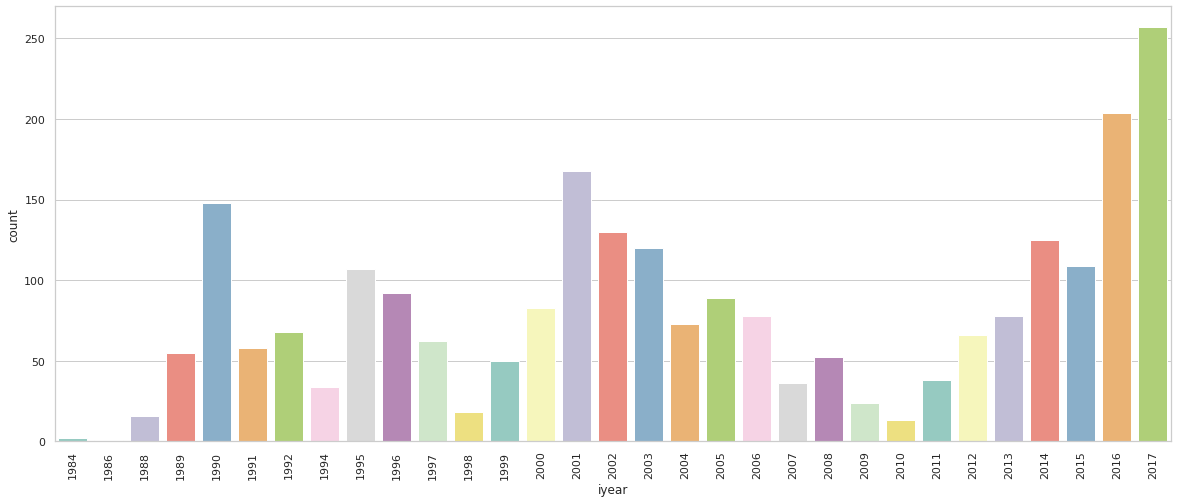

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= J_K['iyear'],palette="Set3")

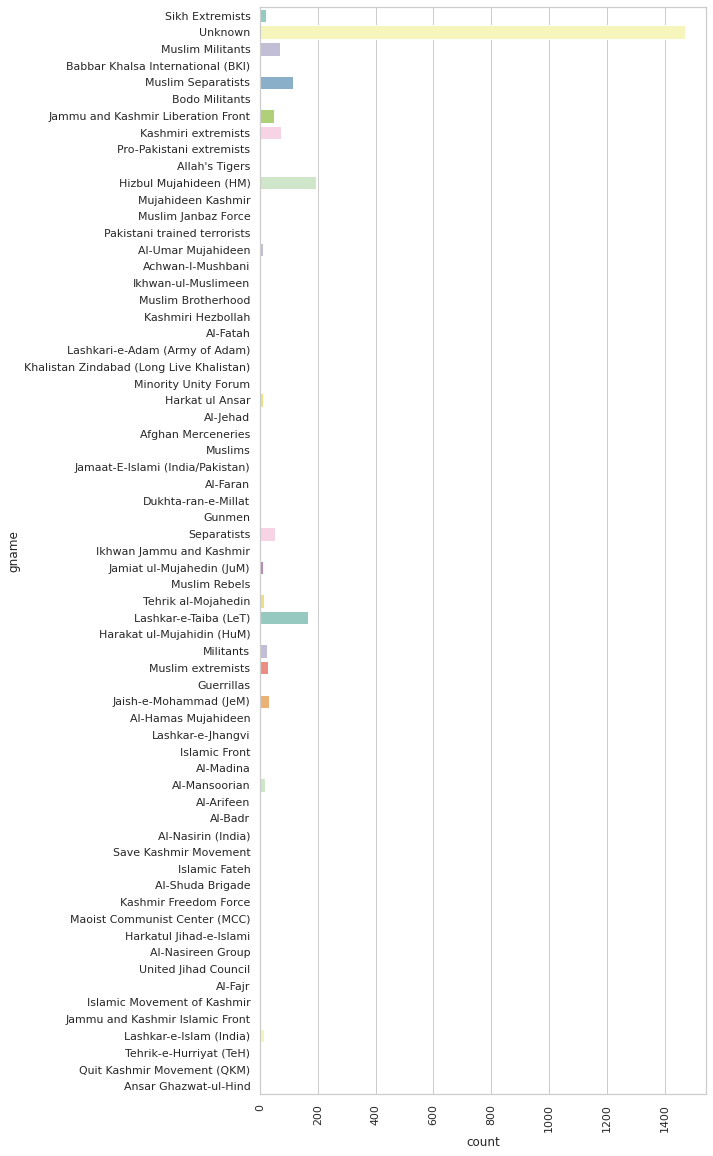

In [ ]:
plt.figure(figsize=(8,20))
plt.xticks(rotation=90)
sns.countplot(y= J_K['gname'],palette="Set3")

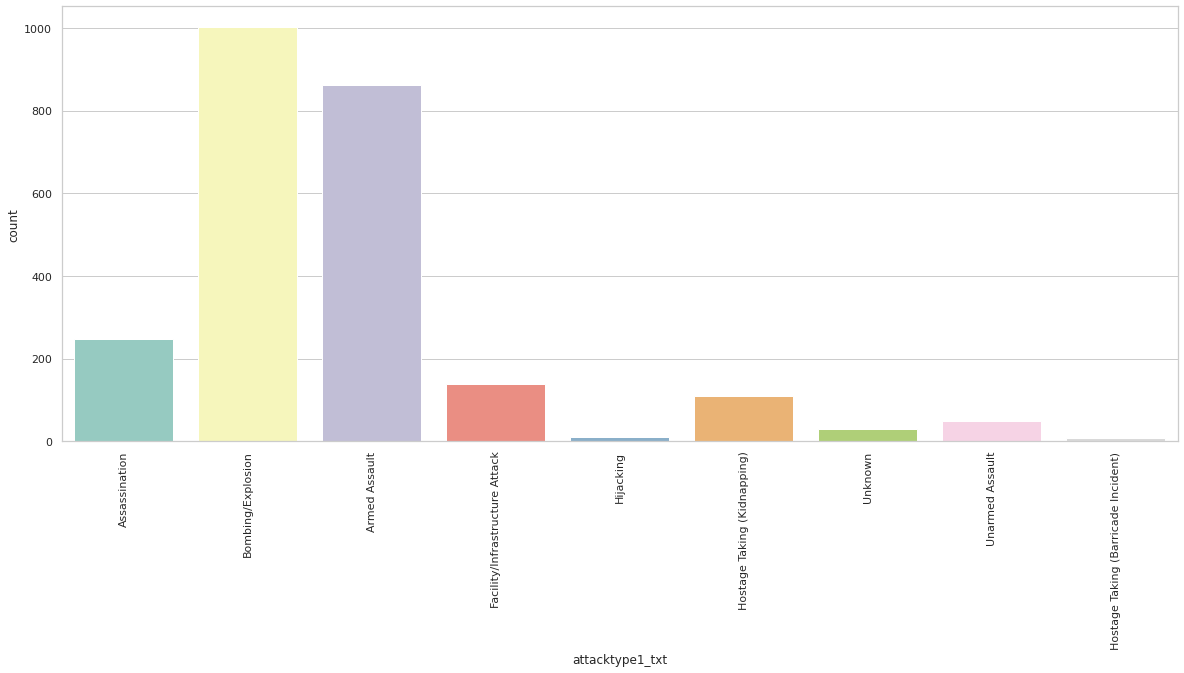

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= J_K['attacktype1_txt'],palette="Set3")

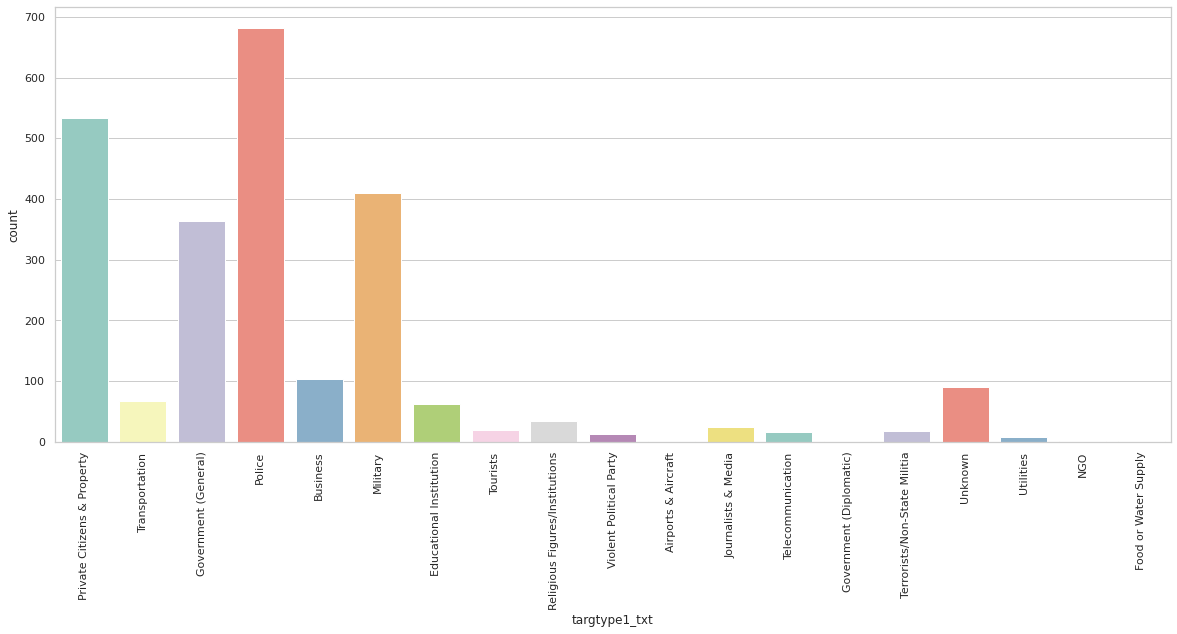

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x= J_K['targtype1_txt'],palette="Set3")

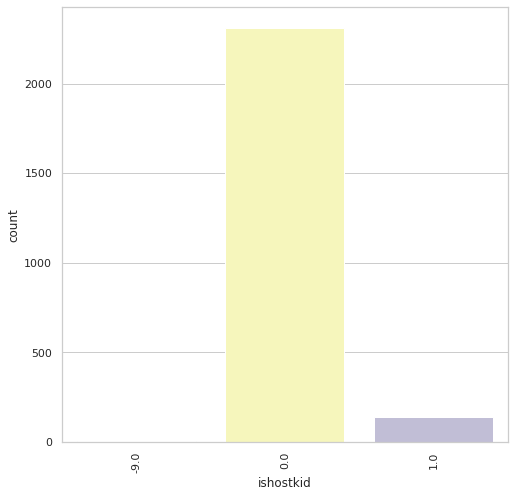

In [ ]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(x= J_K['ishostkid'],palette="Set3" )

In [ ]:
df_jk_year  = pd.DataFrame(J_K.groupby(by  = 'iyear').sum())

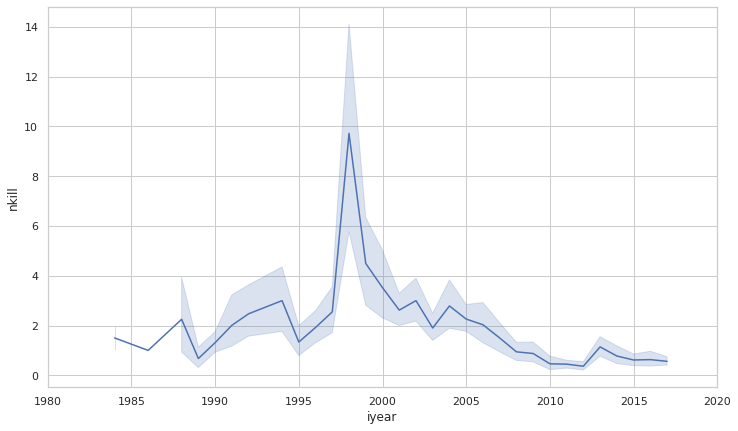

In [ ]:
plt.figure(figsize = (12,7))
plt.xlim(1980,2020,5)
sns.lineplot( x =  J_K['iyear'], y = J_K['nkill'])

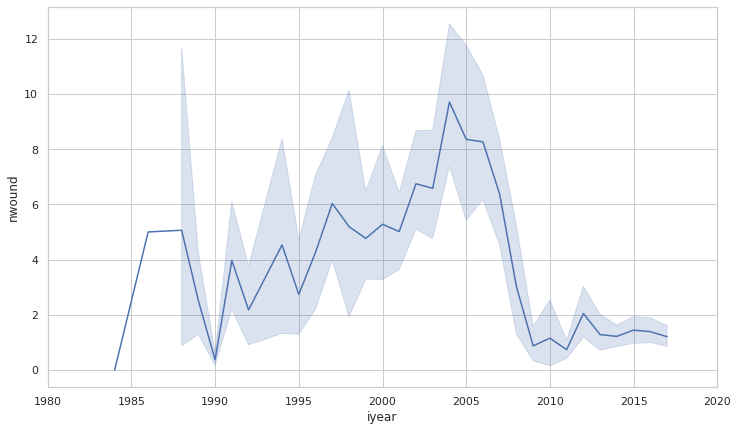

In [ ]:
plt.figure(figsize = (12,7))
plt.xlim(1980,2020,5)
sns.lineplot( x =  J_K['iyear'], y = J_K['nwound'])

A lot of new insights can be found from the given dataset, I tried with my country Morocco but after seeing that Morocco information output wasn't really good see significant, that's why I tried with India as a thaks for the opportunity that India gives through this internship At the spark foundation. Only line plots and count plots are used for this task.

In [3]:
print('Thanks again')

Thanks again
